# Sprint 5. Task M5 T02

## Mustafa Habibi


### Exercise 1
Start the attached data set in train and test. Study the two sets separately, at a descriptive level.

Also attached you will find a description of the different variables of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('housing data.csv', header= None)


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10.TAX       full-value property-tax rate per $10,000
11.PTRATIO   pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.shape

(506, 14)

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


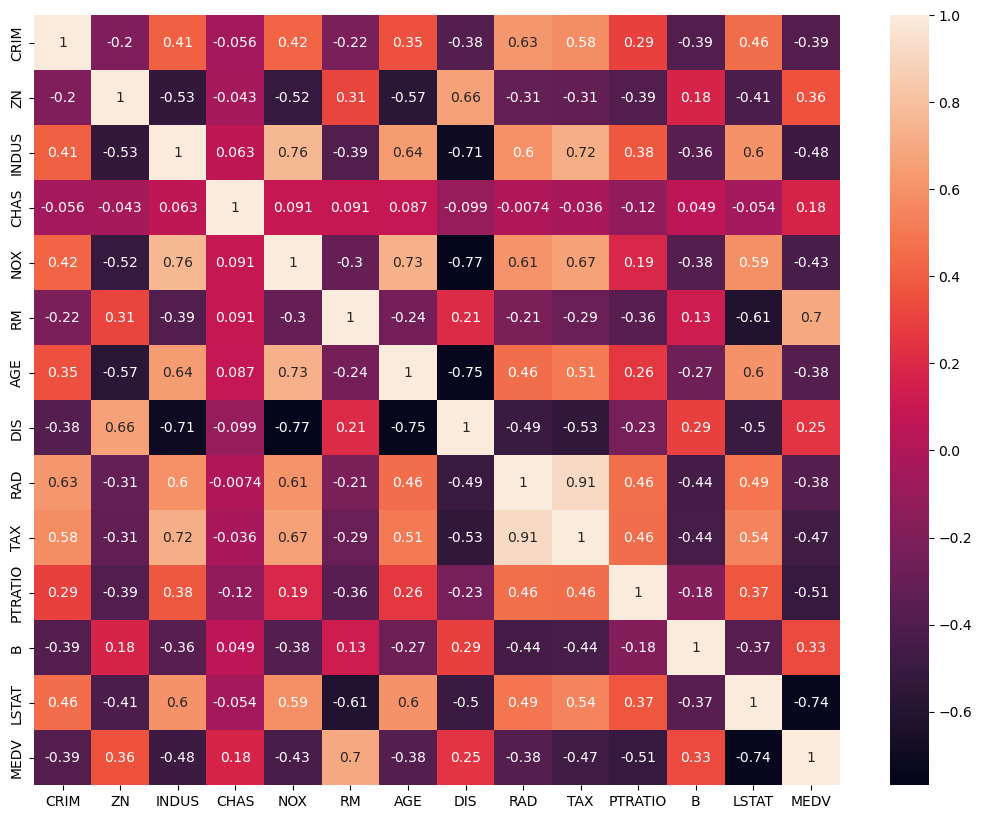

In [12]:
plt.figure(figsize=(13, 10))

sns.heatmap(df.corr(), annot=True)
plt.show()

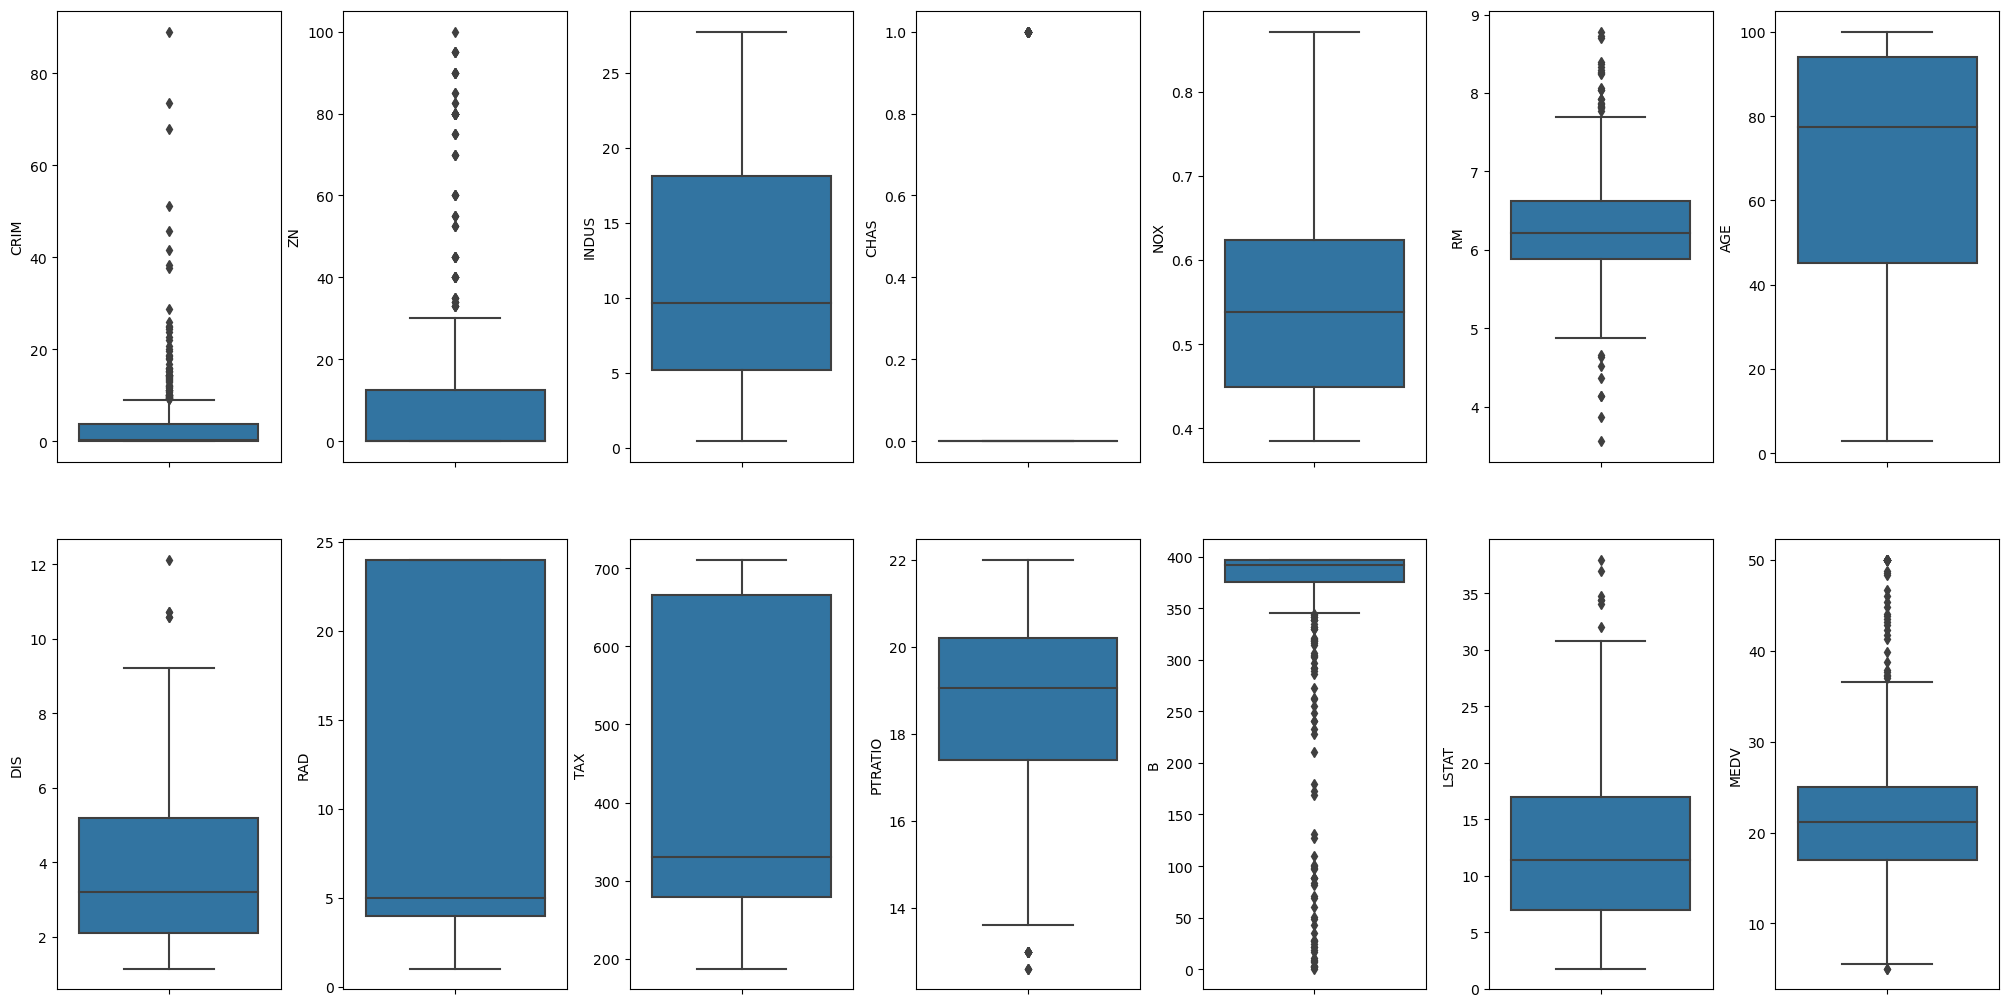

In [13]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [14]:
train, test = train_test_split(df, test_size=0.20, random_state=4)

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.714276,8.497258,0.00632,0.079980,0.26266,3.896877,88.9762
ZN,404.0,10.996287,22.941789,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,404.0,11.085347,6.870004,0.74000,5.130000,9.69000,18.100000,27.7400
CHAS,404.0,0.061881,0.241238,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.557086,0.117656,0.38500,0.449000,0.53800,0.647000,0.8710
RM,404.0,6.272166,0.712302,3.56100,5.886500,6.20850,6.607000,8.7800
AGE,404.0,68.894307,28.096077,2.90000,45.675000,77.50000,93.925000,100.0000
DIS,404.0,3.787746,2.135045,1.12960,2.087875,3.14230,5.141475,12.1265
RAD,404.0,9.784653,8.818302,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,404.0,413.091584,170.053776,187.00000,281.000000,334.50000,666.000000,711.0000


In [16]:
train.shape

(404, 14)

In [17]:
train.size

5656

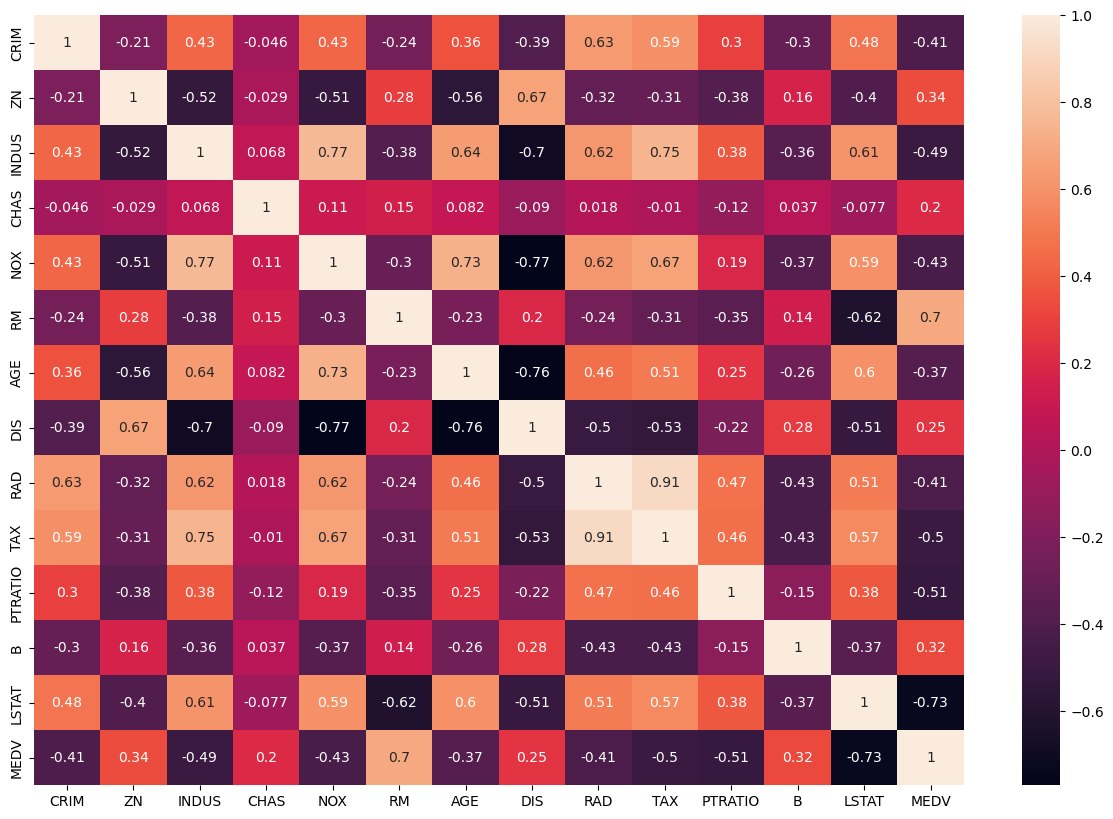

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [19]:
test.shape

(102, 14)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 8 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.0 KB


In [21]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,3.214466,9.035087,0.01301,0.090897,0.23536,1.965348,73.5341
ZN,102.0,12.818627,24.837770,0.00000,0.000000,0.00000,16.250000,95.0000
INDUS,102.0,11.340490,6.851950,0.46000,6.200000,9.90000,18.100000,27.7400
CHAS,102.0,0.098039,0.298836,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,102.0,0.545226,0.108582,0.39200,0.449250,0.52400,0.605000,0.8710
RM,102.0,6.334020,0.663926,4.90300,5.881250,6.22600,6.716000,8.3370
AGE,102.0,67.309804,28.460939,6.60000,42.350000,77.25000,94.400000,100.0000
DIS,102.0,3.823943,1.995116,1.33250,2.203050,3.39480,5.202825,9.2229
RAD,102.0,8.617647,8.228235,1.00000,4.000000,5.00000,8.000000,24.0000
TAX,102.0,389.009804,161.769454,188.00000,277.000000,307.00000,437.000000,711.0000


In [22]:
test.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.181526,0.334268,-0.081437,0.387445,-0.124315,0.310819,-0.333545,0.594925,0.551621,0.257087,-0.664753,0.347444,-0.321164
ZN,-0.181526,1.000000,-0.586213,-0.090956,-0.541308,0.421467,-0.595862,0.631828,-0.297100,-0.344978,-0.445662,0.215155,-0.463538,0.438867
INDUS,0.334268,-0.586213,1.000000,0.043930,0.759983,-0.440501,0.654049,-0.744383,0.495103,0.630279,0.399521,-0.347461,0.574963,-0.454540
CHAS,-0.081437,-0.090956,0.043930,1.000000,0.027381,-0.110096,0.108964,-0.135732,-0.081243,-0.107954,-0.130121,0.091144,0.032481,0.082722
NOX,0.387445,-0.541308,0.759983,0.027381,1.000000,-0.318258,0.727218,-0.768330,0.566764,0.657298,0.197542,-0.431904,0.580646,-0.431026
RM,-0.124315,0.421467,-0.440501,-0.110096,-0.318258,1.000000,-0.290022,0.247747,-0.058949,-0.181421,-0.371661,0.079309,-0.585022,0.672316
AGE,0.310819,-0.595862,0.654049,0.108964,0.727218,-0.290022,1.000000,-0.690203,0.425941,0.511070,0.306810,-0.321040,0.620608,-0.396892
DIS,-0.333545,0.631828,-0.744383,-0.135732,-0.768330,0.247747,-0.690203,1.000000,-0.466686,-0.548328,-0.306131,0.356713,-0.438425,0.260565
RAD,0.594925,-0.297100,0.495103,-0.081243,0.566764,-0.058949,0.425941,-0.466686,1.000000,0.904511,0.428514,-0.527903,0.383263,-0.252088
TAX,0.551621,-0.344978,0.630279,-0.107954,0.657298,-0.181421,0.511070,-0.548328,0.904511,1.000000,0.453790,-0.518606,0.427702,-0.345777


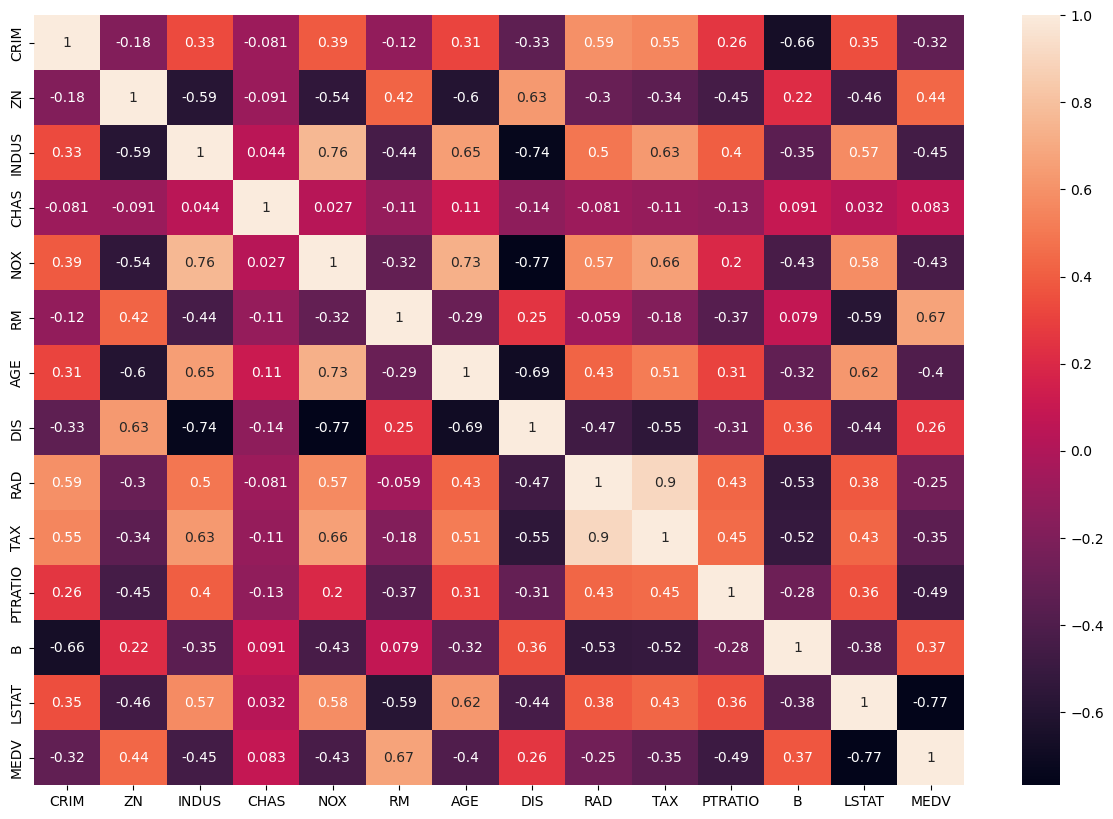

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(test.corr(), annot=True)
plt.show()

In [24]:
df.size

7084

In [25]:
df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

In [26]:
train.std()

CRIM         8.497258
ZN          22.941789
INDUS        6.870004
CHAS         0.241238
NOX          0.117656
RM           0.712302
AGE         28.096077
DIS          2.135045
RAD          8.818302
TAX        170.053776
PTRATIO      2.171029
B           89.476355
LSTAT        7.225008
MEDV         9.067071
dtype: float64

In [27]:
test.std()

CRIM         9.035087
ZN          24.837770
INDUS        6.851950
CHAS         0.298836
NOX          0.108582
RM           0.663926
AGE         28.460939
DIS          1.995116
RAD          8.228235
TAX        161.769454
PTRATIO      2.149821
B           98.496089
LSTAT        6.806263
MEDV         9.685500
dtype: float64

### Exercise 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).

In [28]:
print('Null hypothesis H0, the sample has a normal distribution, It is Guessian')
print('Alternative hypothesis H1, the sample does not  have a normal distribution, It is not Guessian')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('For the variable ', i, 'with a p-value of ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('We cannot reject the null hypothesis, It is Guessian')
    else:
        print('We can reject the null hypothesis, It is not Guessian')

Null hypothesis H0, the sample has a normal distribution, It is Guessian
Alternative hypothesis H1, the sample does not  have a normal distribution, It is not Guessian
For the variable  CRIM with a p-value of  1.3285678005931464e-36
We can reject the null hypothesis, It is not Guessian
For the variable  ZN with a p-value of  7.882576753156324e-34
We can reject the null hypothesis, It is not Guessian
For the variable  INDUS with a p-value of  1.0642375893751083e-17
We can reject the null hypothesis, It is not Guessian
For the variable  CHAS with a p-value of  2.350467979135232e-40
We can reject the null hypothesis, It is not Guessian
For the variable  NOX with a p-value of  5.775851259944009e-14
We can reject the null hypothesis, It is not Guessian
For the variable  RM with a p-value of  2.4107271734408187e-10
We can reject the null hypothesis, It is not Guessian
For the variable  AGE with a p-value of  2.2311304847966706e-18
We can reject the null hypothesis, It is not Guessian
For the

In [29]:
trans = preprocessing.RobustScaler()
train[['CRIM', 'ZN', 'CHAS', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']] = trans.fit_transform(train[['CRIM', 'ZN', 'CHAS', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']])
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
192,-0.046116,3.60,3.44,0.0,0.437,1.345593,26.3,1.092972,5,398.0,-1.380531,-0.036541,-0.858078,1.824773
138,-0.003369,0.00,21.89,0.0,0.624,-0.487856,98.2,-0.482611,4,437.0,0.743363,0.037015,0.998993,-0.966767
251,-0.012725,1.76,5.86,0.0,0.431,0.318529,8.9,1.393241,7,330.0,0.000000,-0.673389,-0.785606,0.422961
13,0.096178,0.00,8.14,0.0,0.538,-0.360167,61.8,0.512575,4,307.0,0.672566,0.267647,-0.315551,-0.108761
256,-0.064786,7.20,3.75,0.0,0.394,1.728661,34.2,1.045913,3,244.0,-1.132743,-0.233480,-0.833920,2.743202


In [30]:
trans = preprocessing.MinMaxScaler()
train[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX' ]] = trans.fit_transform(train[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']])

train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
192,-0.046116,3.60,0.100000,0.0,0.106996,1.345593,0.240989,1.092972,0.173913,0.402672,-1.380531,-0.036541,-0.858078,1.824773
138,-0.003369,0.00,0.783333,0.0,0.491770,-0.487856,0.981462,-0.482611,0.130435,0.477099,0.743363,0.037015,0.998993,-0.966767
251,-0.012725,1.76,0.189630,0.0,0.094650,0.318529,0.061792,1.393241,0.260870,0.272901,0.000000,-0.673389,-0.785606,0.422961
13,0.096178,0.00,0.274074,0.0,0.314815,-0.360167,0.606591,0.512575,0.130435,0.229008,0.672566,0.267647,-0.315551,-0.108761
256,-0.064786,7.20,0.111481,0.0,0.018519,1.728661,0.322348,1.045913,0.086957,0.108779,-1.132743,-0.233480,-0.833920,2.743202


In [31]:
trans = preprocessing.RobustScaler()
test[['CRIM', 'ZN', 'CHAS', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']] = trans.fit_transform(test[['CRIM', 'ZN', 'CHAS', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']])
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,-0.012868,0.769231,7.87,0.0,0.524,-0.712788,100.0,0.895834,5,311.0,-1.214286,-0.298007,1.929625,-0.388350
289,-0.102638,3.230769,5.32,0.0,0.405,0.406110,22.9,1.307565,6,293.0,-0.714286,-1.022849,-0.183700,0.417476
68,-0.053253,0.769231,6.07,0.0,0.409,-0.757113,36.8,1.034478,4,345.0,0.107143,0.201264,0.186805,-0.300971
211,0.074913,0.000000,10.59,1.0,0.489,-0.984726,88.6,0.090073,4,277.0,0.000000,0.120564,1.313842,-0.116505
226,0.078306,0.000000,6.20,0.0,0.504,2.173106,86.5,-0.059704,8,307.0,-0.428571,-0.261546,-0.843984,1.660194


In [32]:
trans = preprocessing.MinMaxScaler()
test[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX' ]] = trans.fit_transform(test[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']])

test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
8,-0.012868,0.769231,0.271628,0.0,0.275574,-0.712788,1.000000,0.895834,0.173913,0.235182,-1.214286,-0.298007,1.929625,-0.388350
289,-0.102638,3.230769,0.178152,0.0,0.027140,0.406110,0.174518,1.307565,0.217391,0.200765,-0.714286,-1.022849,-0.183700,0.417476
68,-0.053253,0.769231,0.205645,0.0,0.035491,-0.757113,0.323340,1.034478,0.130435,0.300191,0.107143,0.201264,0.186805,-0.300971
211,0.074913,0.000000,0.371334,1.0,0.202505,-0.984726,0.877944,0.090073,0.130435,0.170172,0.000000,0.120564,1.313842,-0.116505
226,0.078306,0.000000,0.210411,0.0,0.233820,2.173106,0.855460,-0.059704,0.304348,0.227533,-0.428571,-0.261546,-0.843984,1.660194


## Exercise 3
It summarizes the newly generated columns statistically and graphically

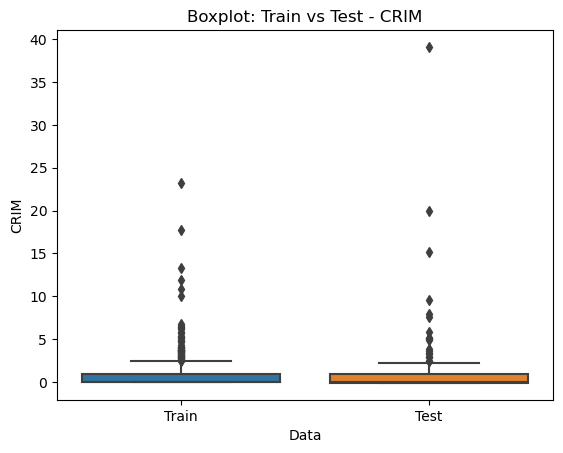

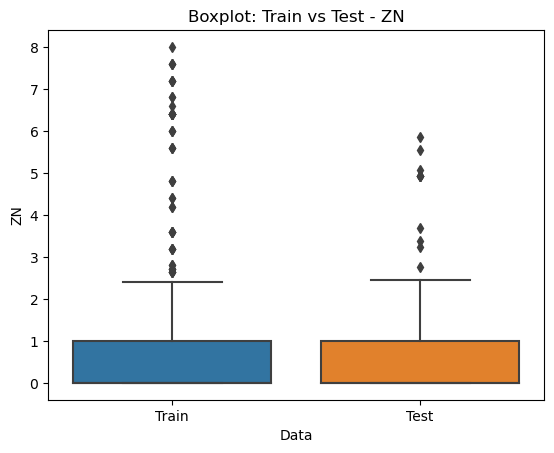

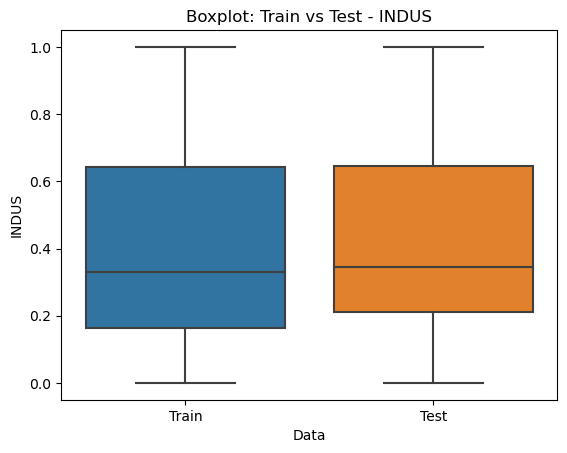

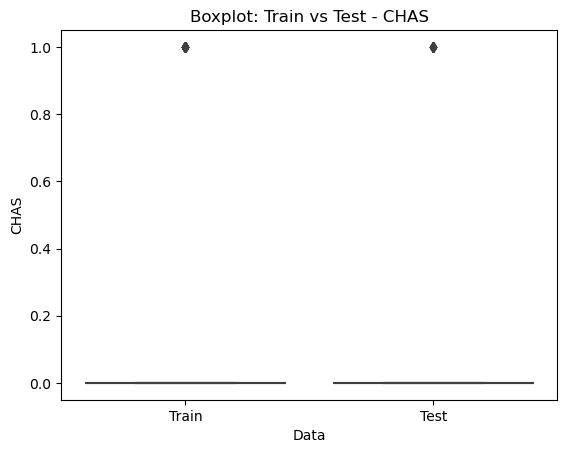

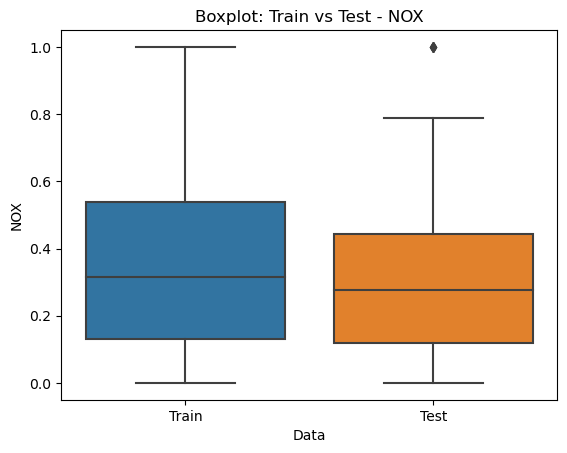

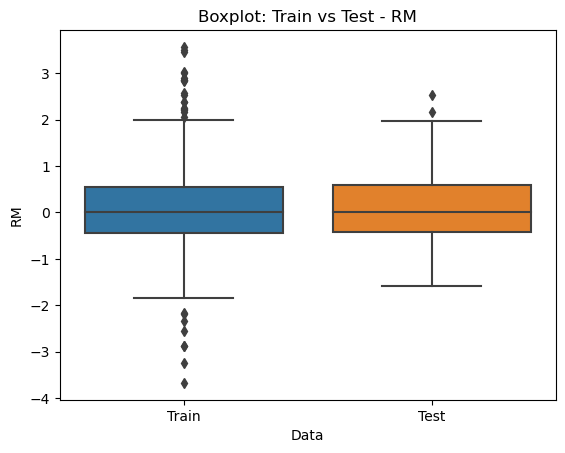

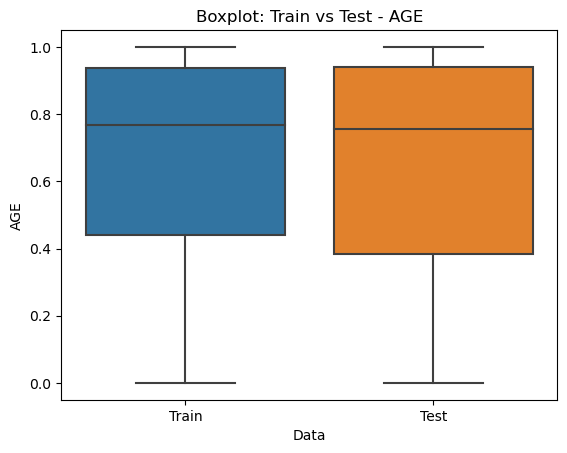

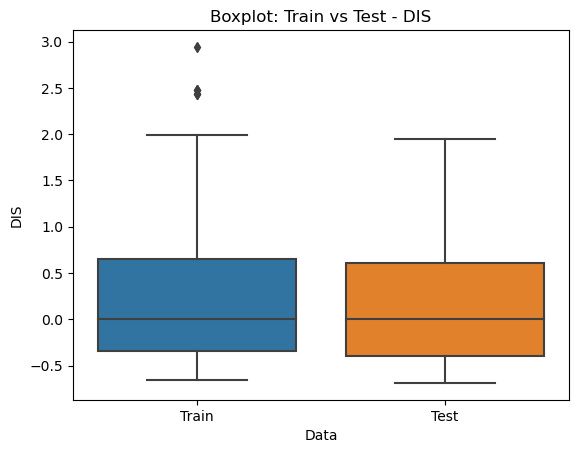

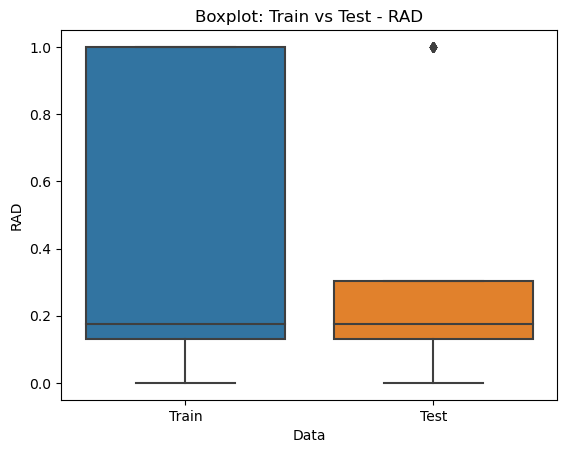

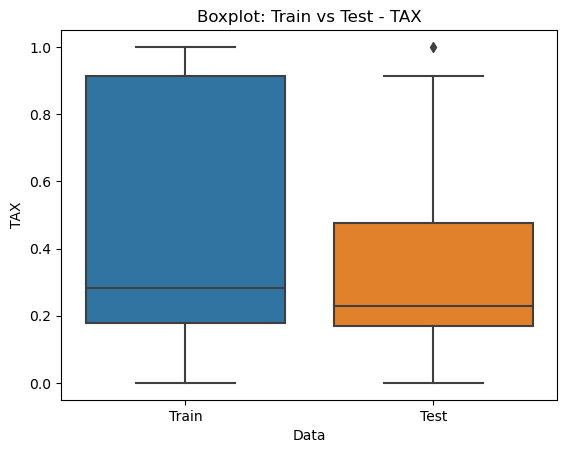

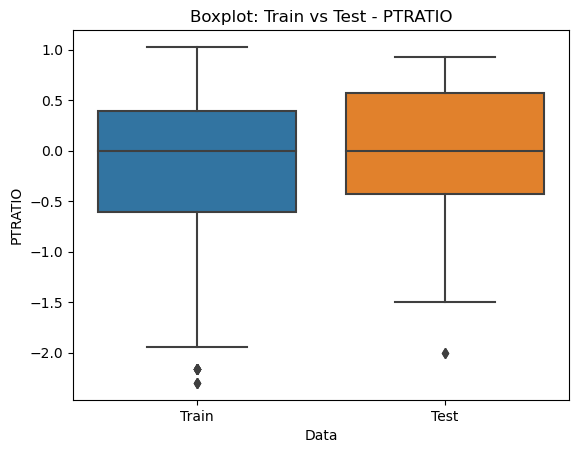

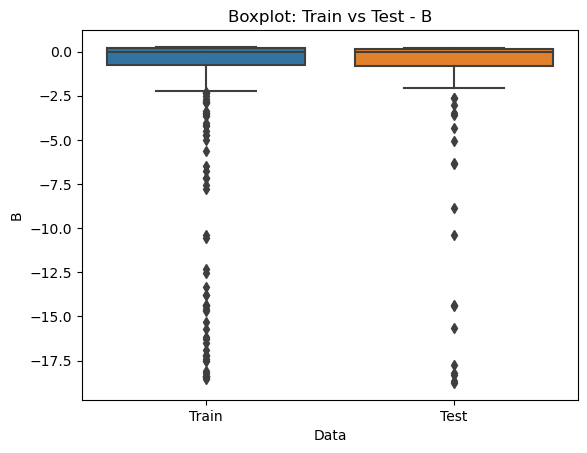

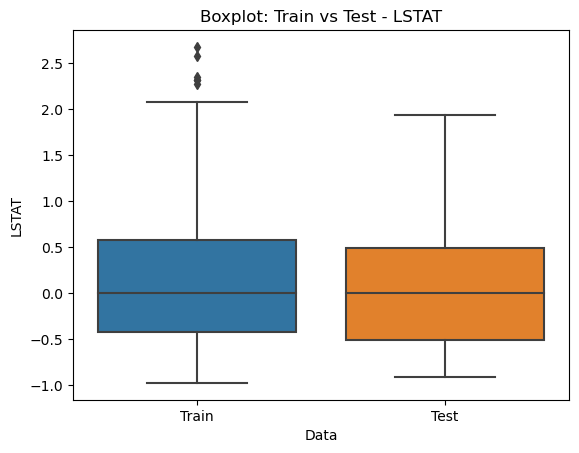

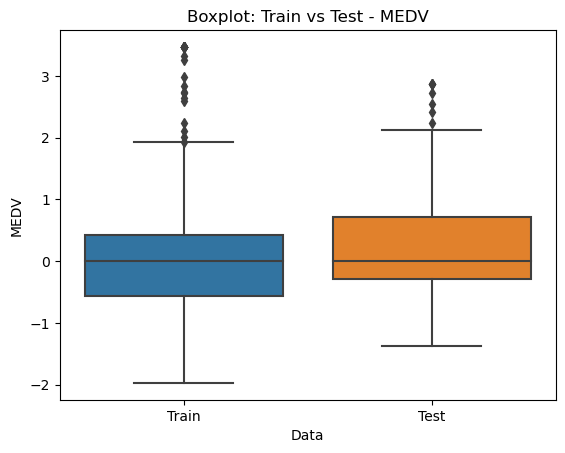

In [33]:
train_columns = train.columns
test_columns = test.columns

for column in train_columns:
    train_column = train[column]
    test_column = test[column]

    combined_df = pd.concat([train_column, test_column], keys=['Train', 'Test'], axis=1)

    combined_df = combined_df.melt(var_name='Data', value_name='Value')

    sns.boxplot(x='Data', y='Value', data=combined_df)

    plt.xlabel('Data')
    plt.ylabel(f'{column}')
    plt.title(f'Boxplot: Train vs Test - {column}')

    plt.show()

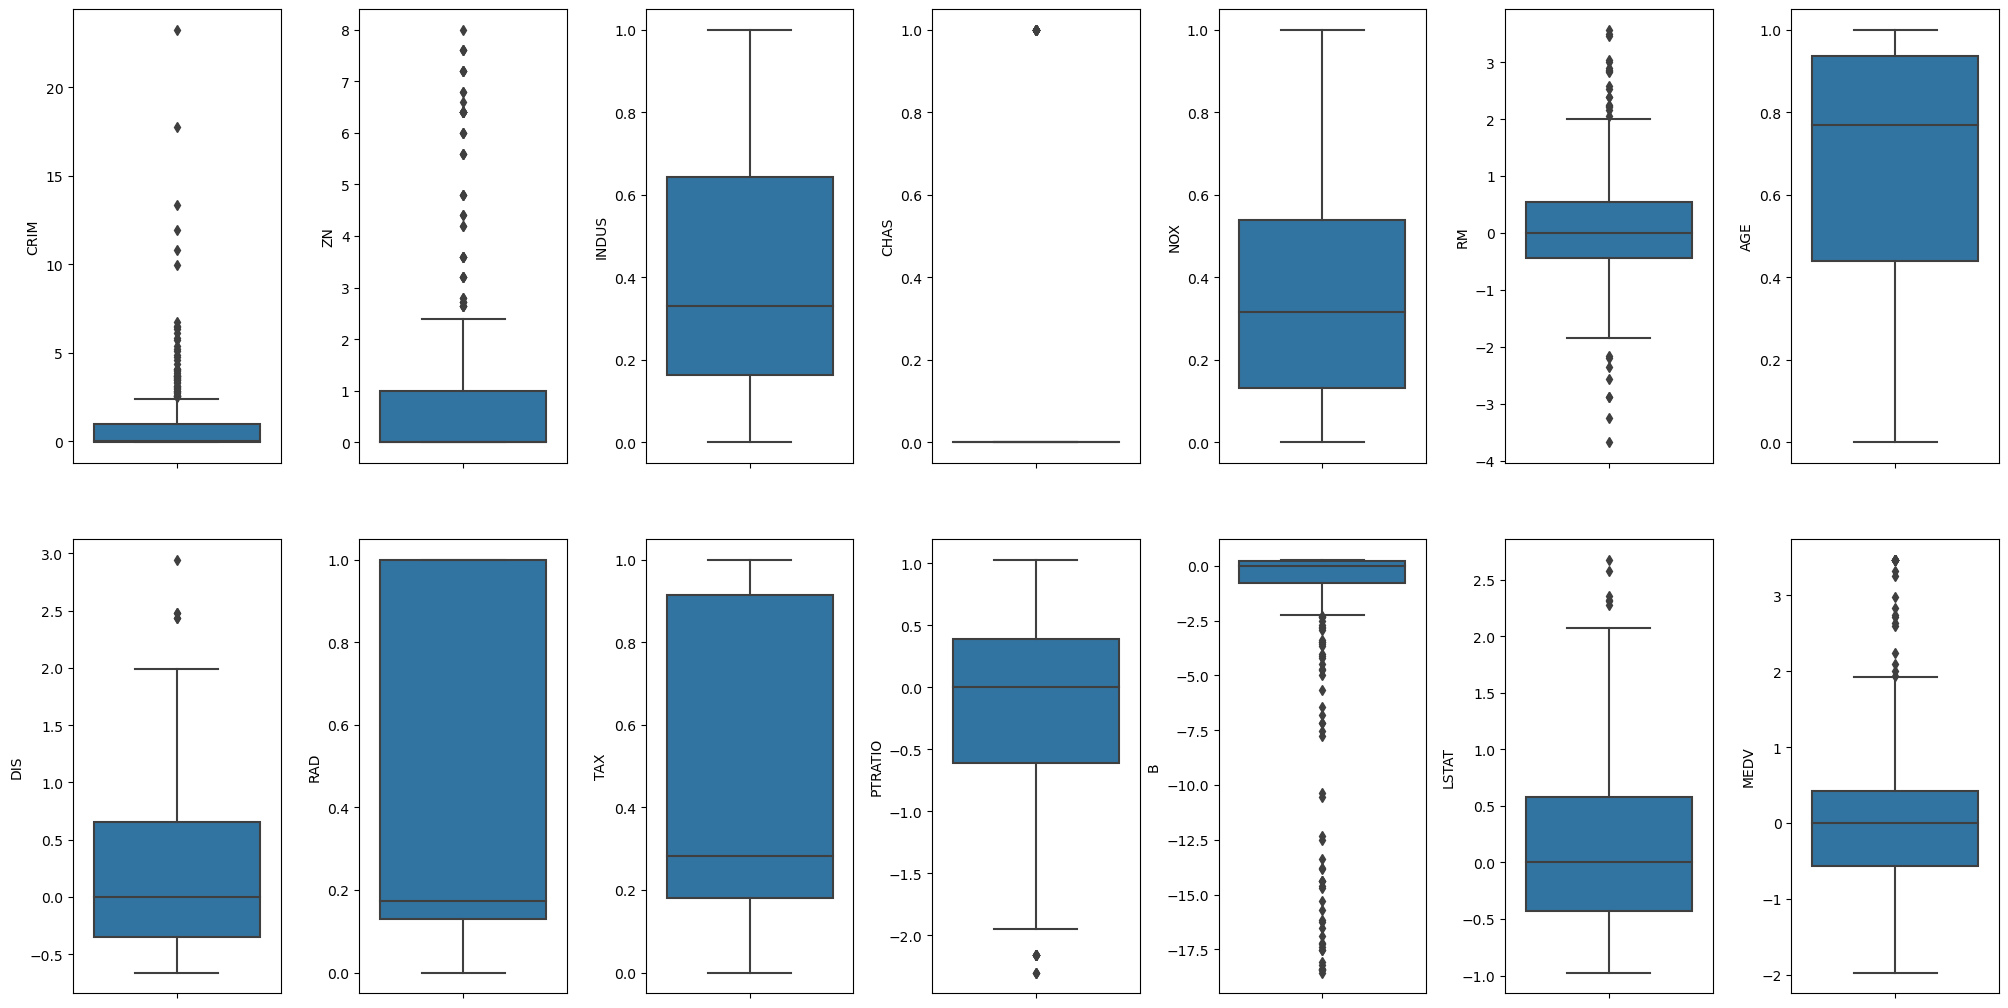

In [34]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in train.items():
    sns.boxplot(y=k, data=train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

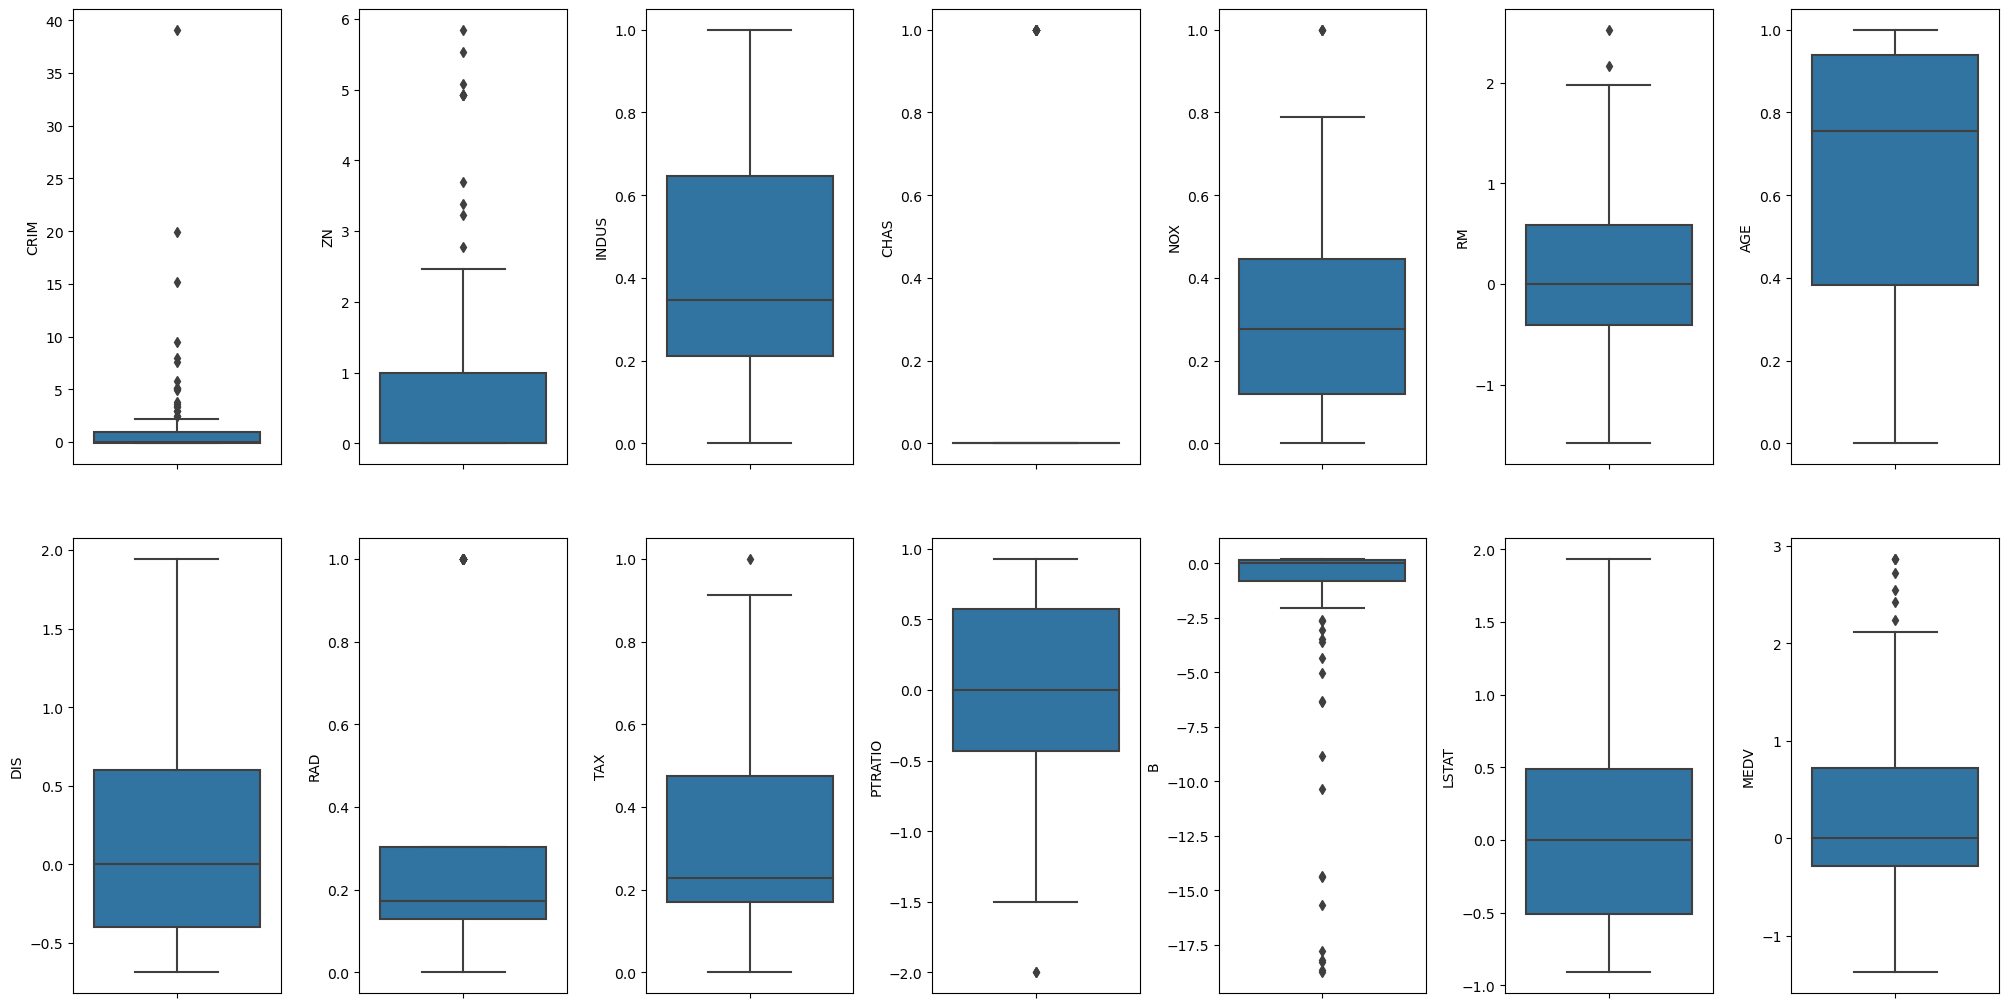

In [35]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in test.items():
    sns.boxplot(y=k, data=test, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Figure size 640x480 with 0 Axes>

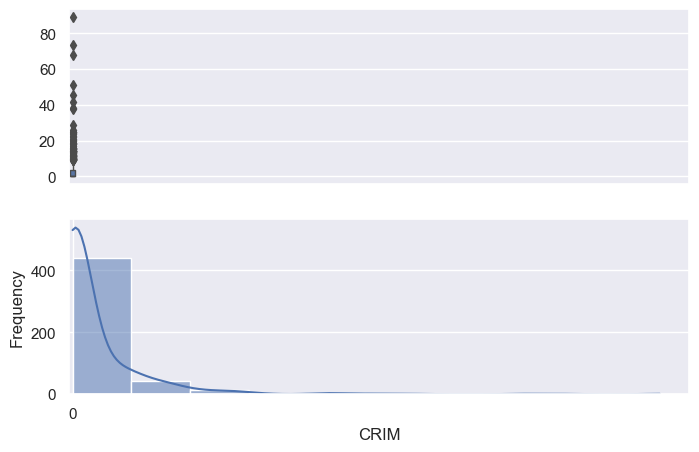

<Figure size 800x500 with 0 Axes>

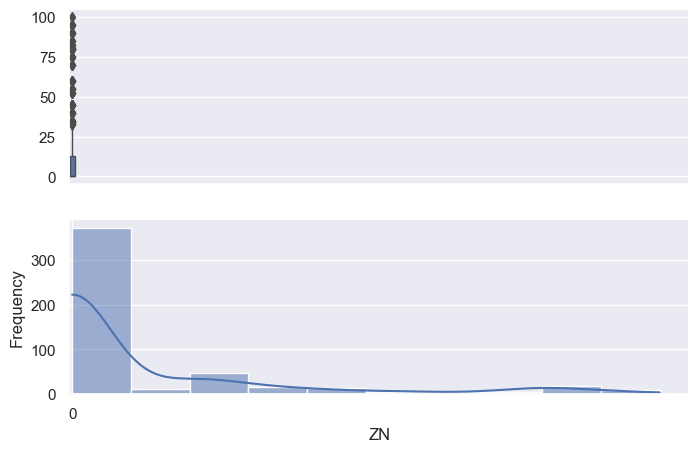

<Figure size 800x500 with 0 Axes>

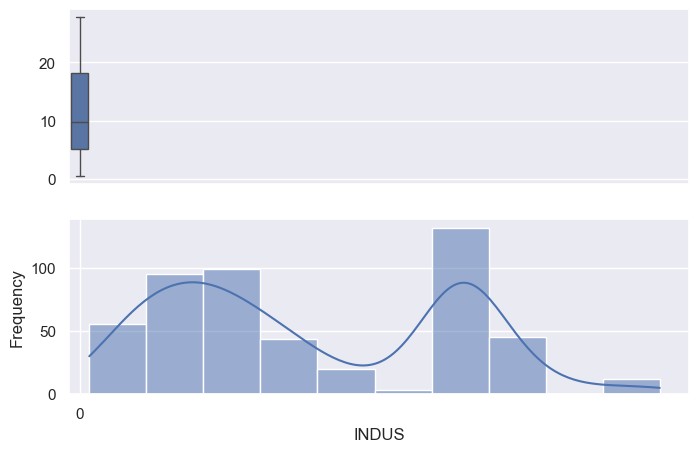

<Figure size 800x500 with 0 Axes>

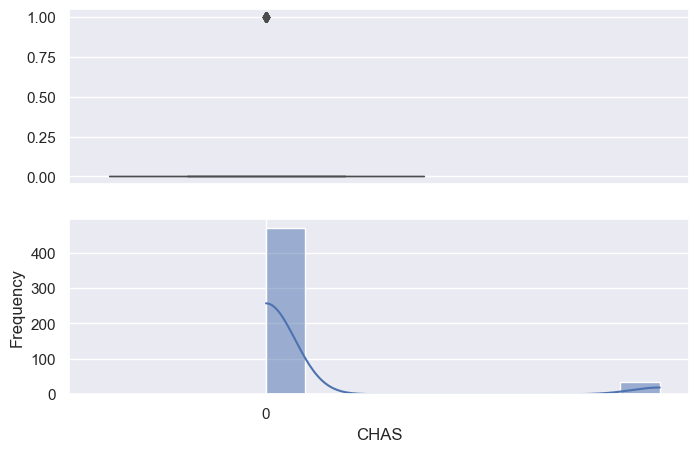

<Figure size 800x500 with 0 Axes>

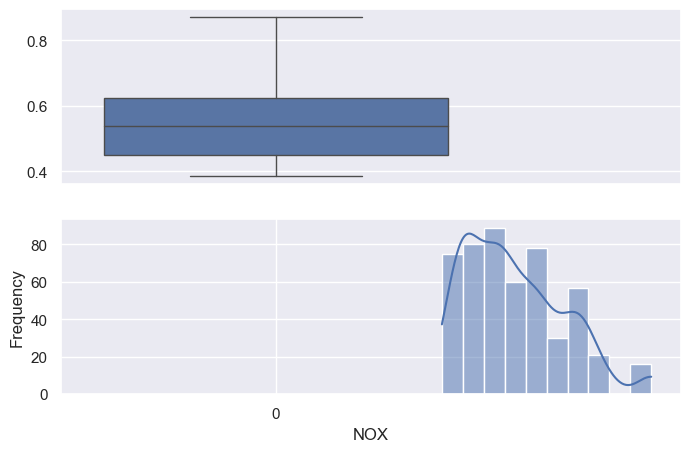

<Figure size 800x500 with 0 Axes>

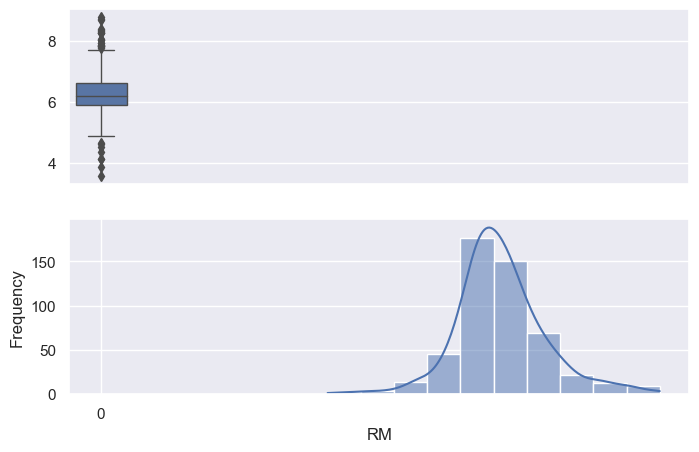

<Figure size 800x500 with 0 Axes>

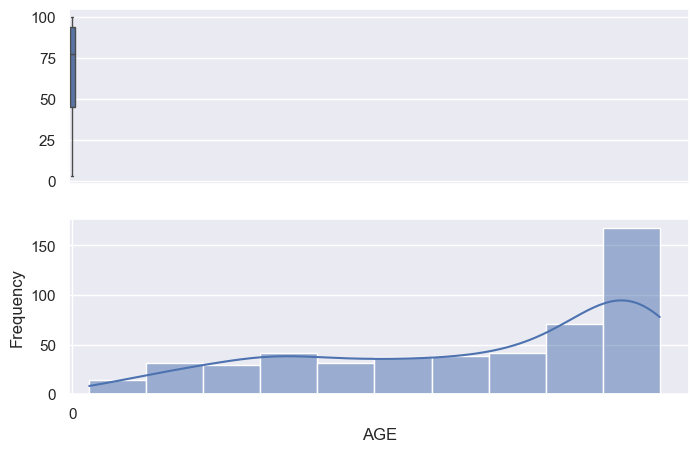

<Figure size 800x500 with 0 Axes>

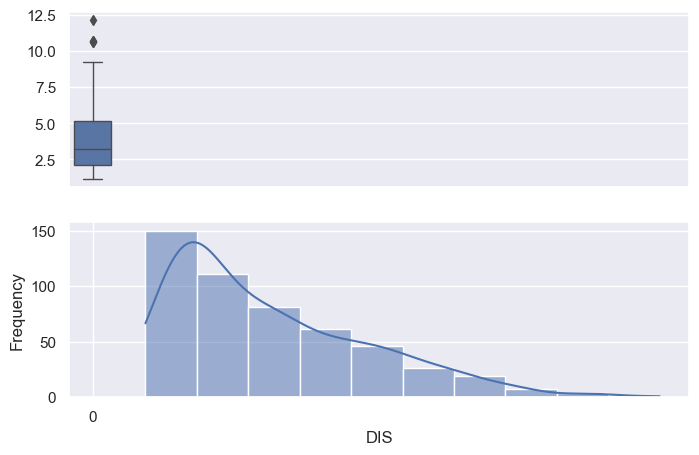

<Figure size 800x500 with 0 Axes>

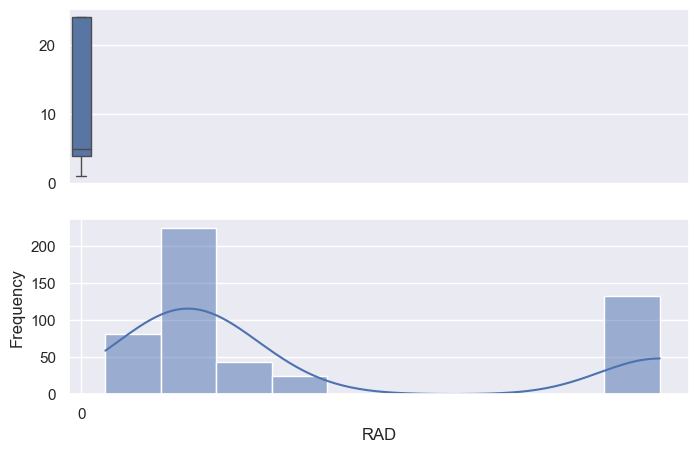

<Figure size 800x500 with 0 Axes>

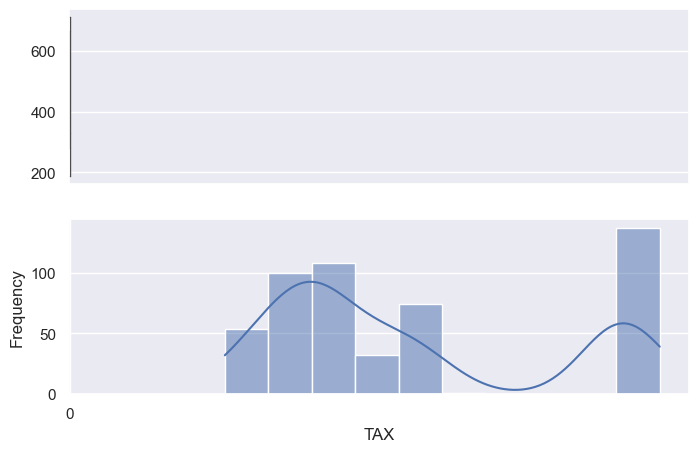

<Figure size 800x500 with 0 Axes>

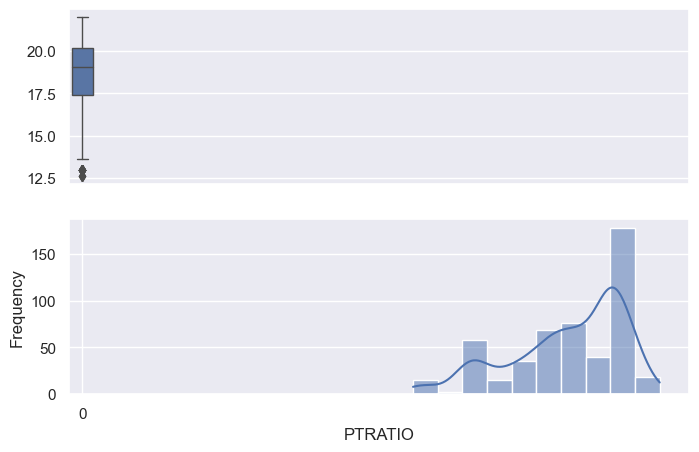

<Figure size 800x500 with 0 Axes>

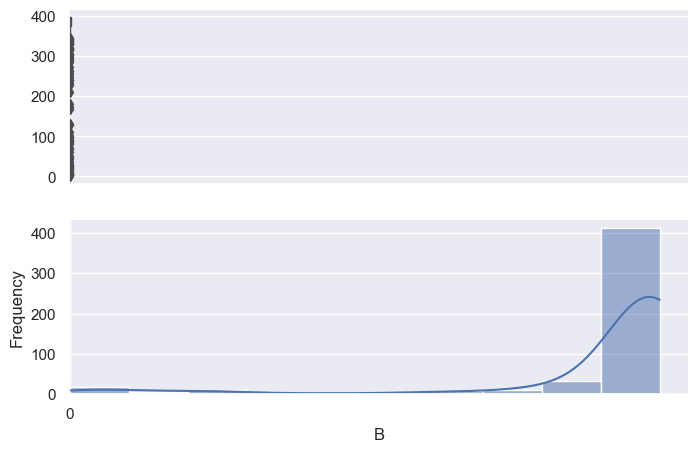

<Figure size 800x500 with 0 Axes>

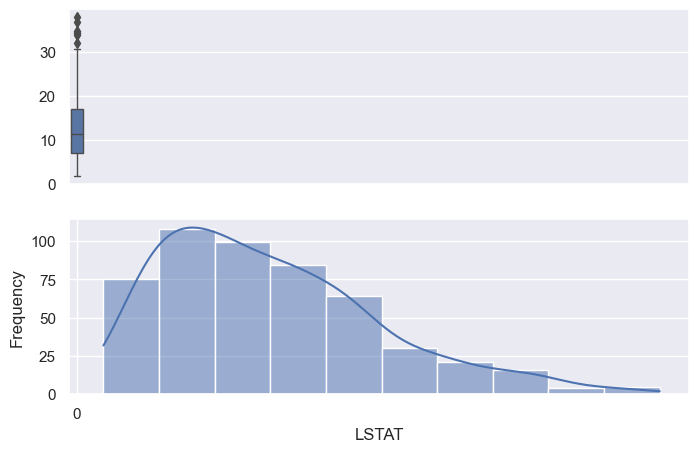

<Figure size 800x500 with 0 Axes>

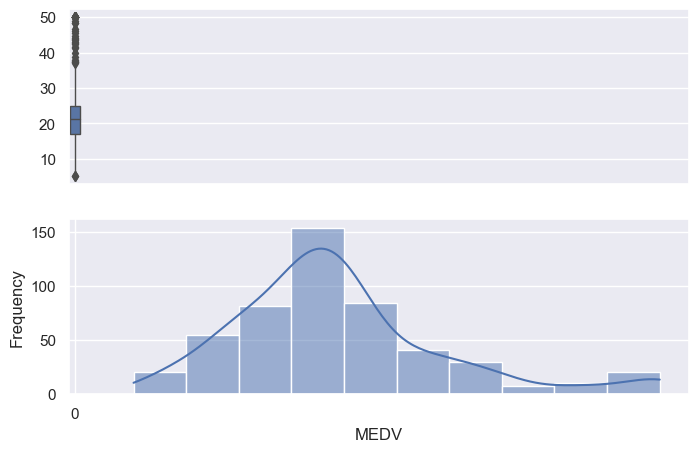

In [36]:
import warnings
warnings.filterwarnings("ignore")

for i in train.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

<Figure size 800x500 with 0 Axes>

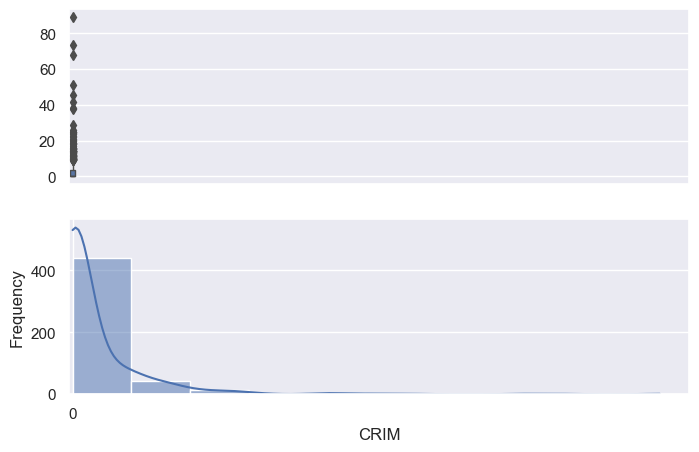

<Figure size 800x500 with 0 Axes>

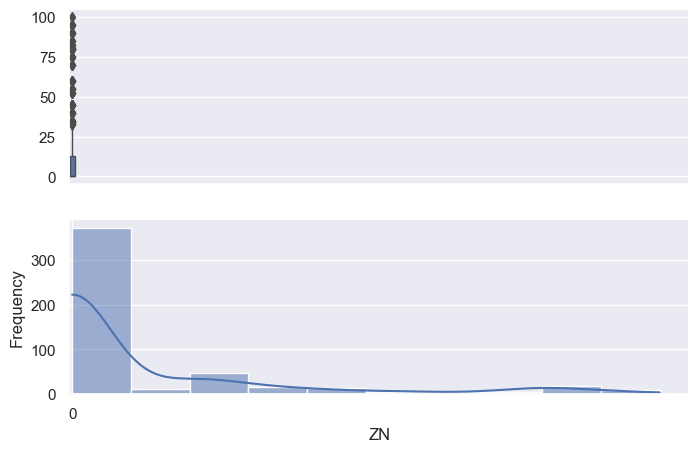

<Figure size 800x500 with 0 Axes>

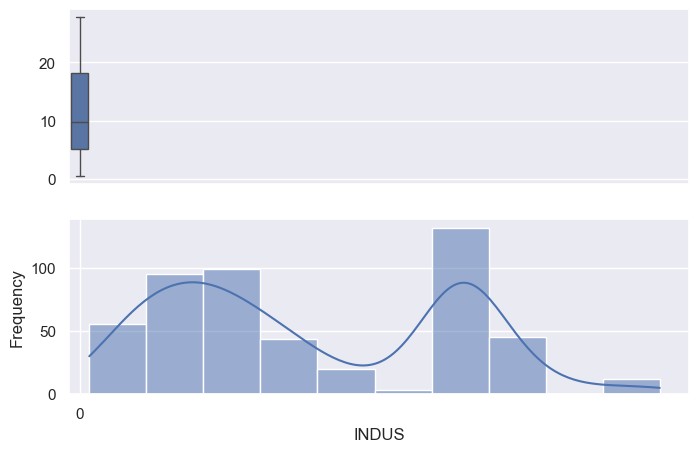

<Figure size 800x500 with 0 Axes>

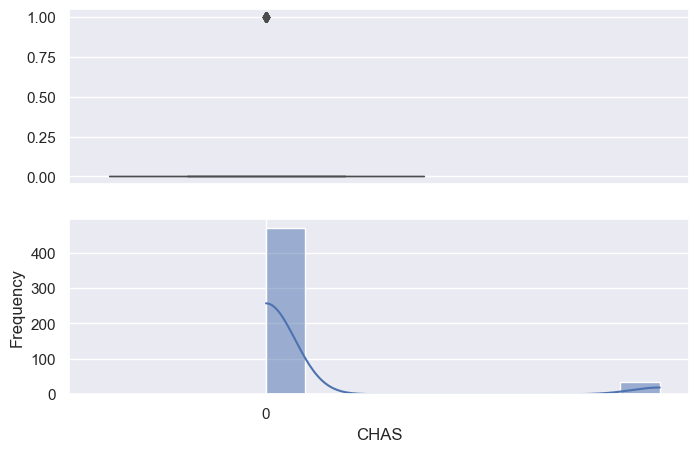

<Figure size 800x500 with 0 Axes>

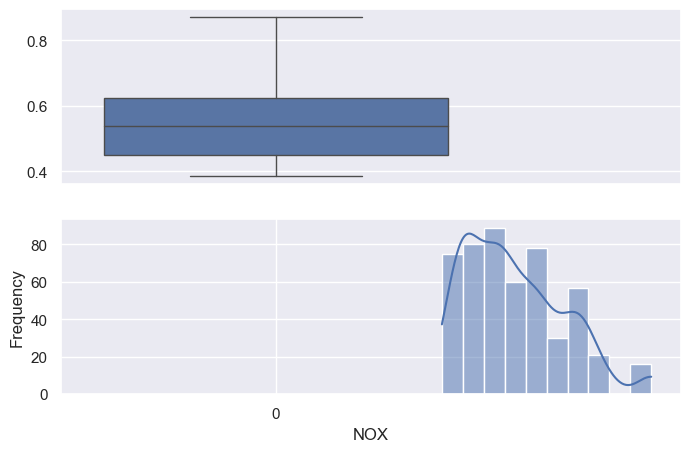

<Figure size 800x500 with 0 Axes>

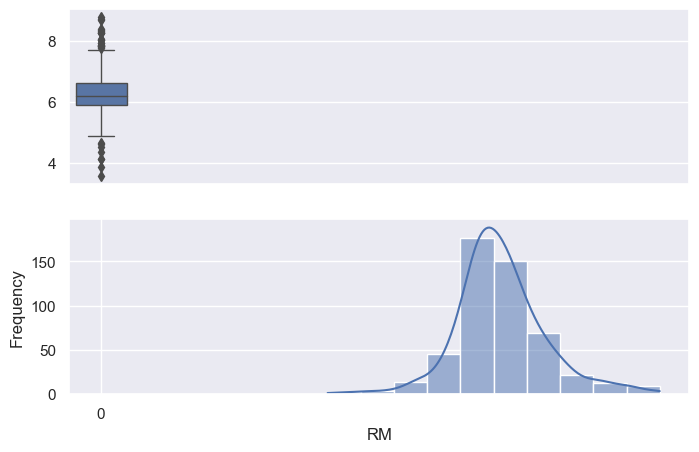

<Figure size 800x500 with 0 Axes>

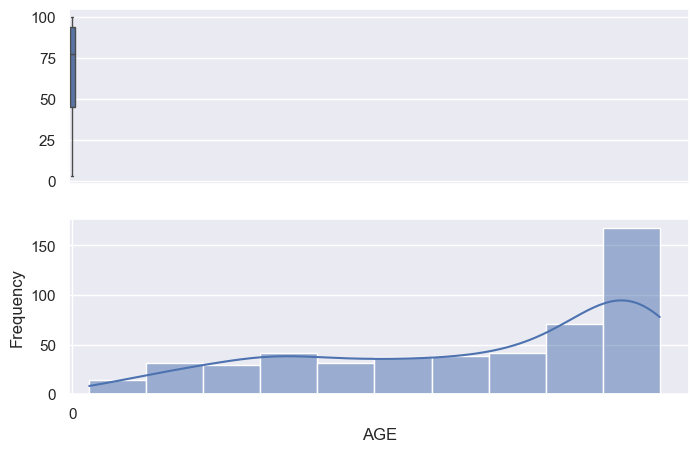

<Figure size 800x500 with 0 Axes>

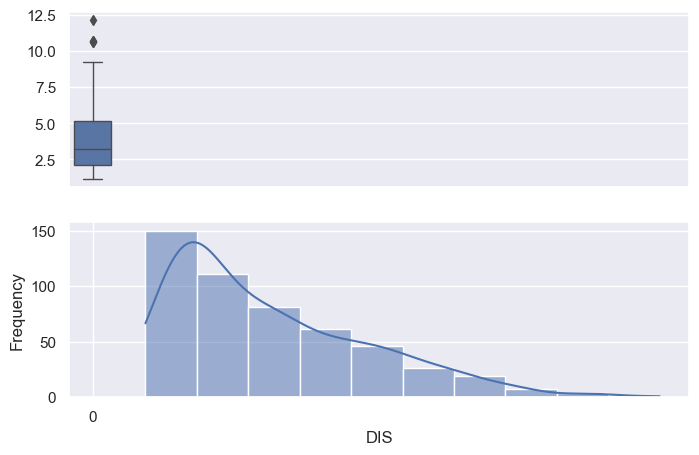

<Figure size 800x500 with 0 Axes>

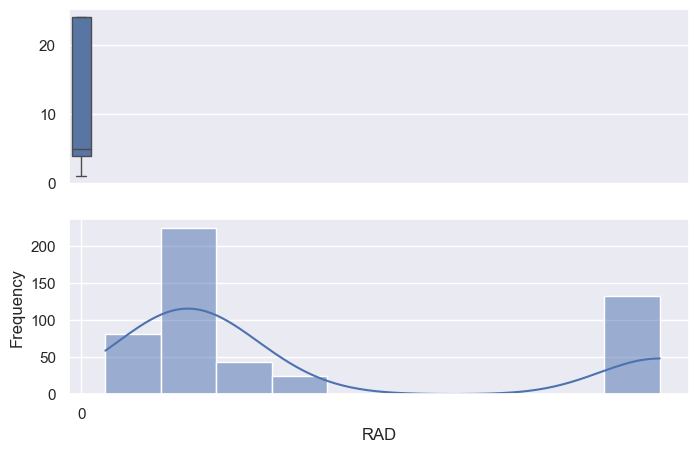

<Figure size 800x500 with 0 Axes>

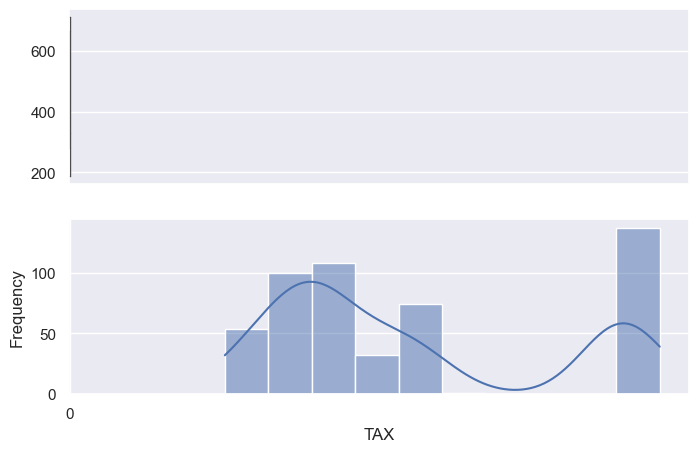

<Figure size 800x500 with 0 Axes>

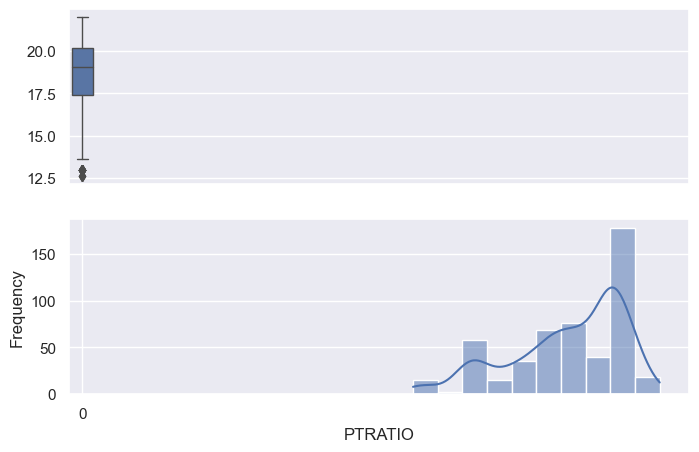

<Figure size 800x500 with 0 Axes>

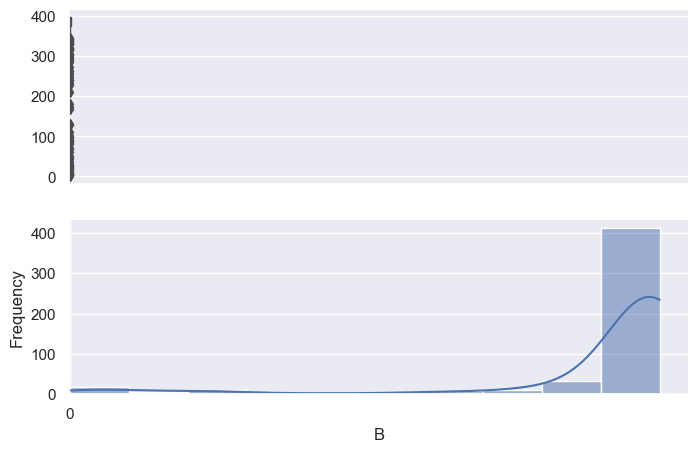

<Figure size 800x500 with 0 Axes>

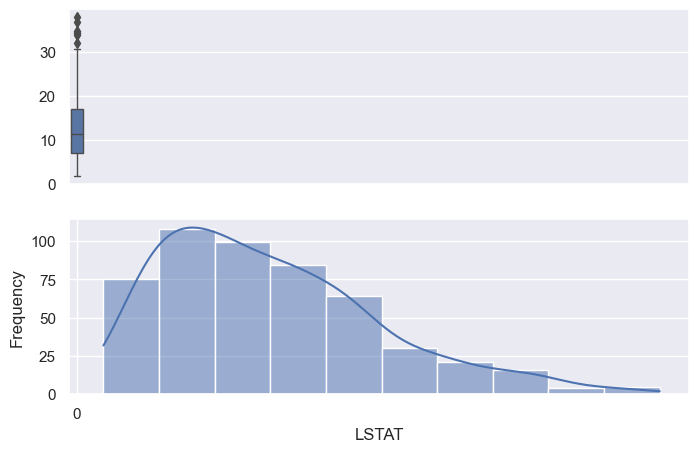

<Figure size 800x500 with 0 Axes>

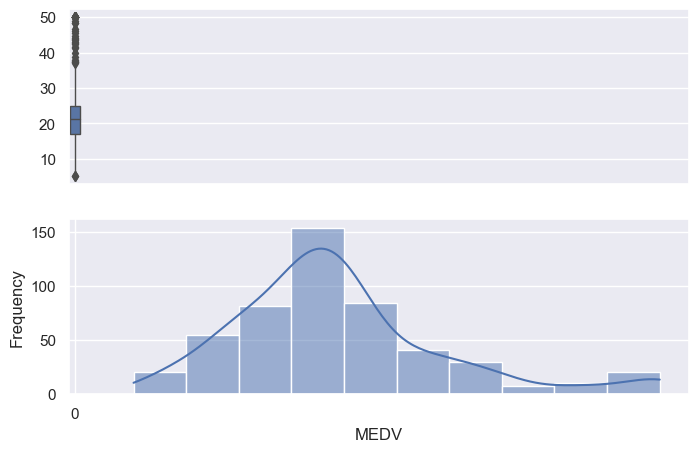

In [37]:
for i in test.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)